                  PROJETO de Portfólio

                    Empresa Walmart

                                                                
              por Jean Carlo Balem Bonatto

## 1) Business Understanding

### 1.1) Objetivo do Projeto

A Gerência da operação global do Walmart precisa estruturar o planejamento para 
os próximos anos. Para isso, precisa de uma estimativa, baseada em dados, de 
quanto aquele departamento irá lucrar ao longo do ano.

## 2) Data Understanding

### 2.1) Entendimento dos Metadados

São apresentados os dados de vendas semanais por departamento de 45 lojas do 
Walmart localizadas em diferentes regiões. 

Em adicional, também é fornecido variáveis como temperatura média da semana, preço do combustível, feriado, taxa 
de desemprego e outros valores.

Também são apresentadas 5 variáveis chamadas Markdown, que representam 
dados anônimos relacionados a descontos promocionais.

##### Entendimento das Features

Store: O número da loja

Size: Tamanho da Loja

Type: Tipo de Loja

Departamento: Número departamento da Loja

Date: especificando a semana (sexta-feira de cada semana) [Será 
utilizada somente para visualizações e não treinamento]

Temperature: Temperatura média na região (em °F)

FuelPrice: Custo do combustível na região

Weekly Sales: Representa as vendas semanais

Descrição dos Dados

MarkDown1-5: Dados de promoção aplicadas nas lojas. Disponíveis 
apenas após novembro de 2011 e não estão disponíveis para todas as 
lojas o tempo todo. Qualquer valor ausente é marcado com Nulo (Ou 
seja, sem promoção).

CPI: índice de preços ao consumidor (Consumer Price Index)

Unployment: Taxa de desemprego

IsHoliday: se a semana é um feriado especial

## 3) Data Preparation

### 3.1) Import das Bibliotecas

In [82]:
#Bibliotecas de Tratamentos dos dados
import pandas as pd
import numpy as np

#Biblioteca de Visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

#Biblioteca para Escalonamento das Váriaveis
from sklearn.preprocessing import StandardScaler

#Bibliotecas de Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor, HuberRegressor 
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor

#Bibliotecas de Métricas
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Biblioteca para Pipeline
from sklearn.pipeline import make_pipeline

### 3.2) Import dos dados

In [83]:
features = pd.read_csv('features.csv', sep= ",")
stores = pd.read_csv('stores.csv', sep= ",")
dept = pd.read_csv('dept.csv', sep= ",")

In [84]:
print("O Shape dos valores é:", features.shape)
features.head()

O Shape dos valores é: (8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [85]:
print("O Shape dos valores é:", stores.shape)
stores.head()

O Shape dos valores é: (45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [86]:
print("O Shape dos valores é:", dept.shape)
dept.head()

O Shape dos valores é: (421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


###  3.3) EDA e Data Cleaning e Wrangling


In [87]:
#União das tabelas pela Loja
df = dept.merge(features, how = 'left', on = ['Store','Date'])\
         .merge(stores, how = 'left', on = 'Store')
print("O Shape dos valores é:", df.shape)
df.head()

O Shape dos valores é: (421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [88]:
#Analise das informações dos tipos das váriáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

#### 3.3.1) Tratamento dos tipos

In [89]:
#Alteração para os tipos corretos das variaveis
    #Alteração para o tipo date
df['Date'] = pd.to_datetime(df['Date'])

    #Como Store é a Loja, correto enquadrar como category.
df['Store'] = df['Store'].astype('category') 
 
    #Como Dept é o departamento da loja, correto enquadrar como category.
df['Dept'] = df['Dept'].astype('category') 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  category      
 1   Dept          421570 non-null  category      
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

In [90]:
#Avaliação da quantidade de nulos
print('Quantidade de linhas do Dataset', df.shape[0])

#Soma os nulos, e aplica uma divisão pelo total de linhas, multiplicados por 100.
print("Retorna abaixo % de nulos do dataset")
df.isnull().sum()/df.shape[0]*100


Quantidade de linhas do Dataset 421570
Retorna abaixo % de nulos do dataset


Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday_x      0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
IsHoliday_y      0.000000
Type             0.000000
Size             0.000000
dtype: float64

<AxesSubplot: >

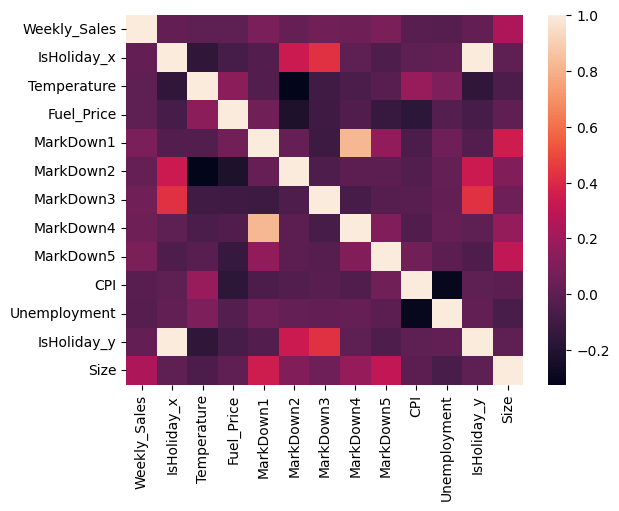

In [91]:
#Análise da Correlação das váriaveis
sns.heatmap(df.corr(method="pearson"))

#### 3.3.2) Tratamento dos Nulos

In [92]:
#A variavel MarkDown1 à 5 é referente a promoção, é coerente ter muitos nulos. 
    #Os mesmos serão substituidos por 0(zero).
df.MarkDown1.fillna(value=0, inplace=True)
df.MarkDown2.fillna(value=0, inplace=True)
df.MarkDown3.fillna(value=0, inplace=True)
df.MarkDown5.fillna(value=0, inplace=True)

#Verificação da retirada dos Nulos
print("Retorna abaixo % de nulos do dataset")
df.isnull().sum()/df.shape[0]*100

Retorna abaixo % de nulos do dataset


Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday_x      0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1        0.000000
MarkDown2        0.000000
MarkDown3        0.000000
MarkDown4       67.984676
MarkDown5        0.000000
CPI              0.000000
Unemployment     0.000000
IsHoliday_y      0.000000
Type             0.000000
Size             0.000000
dtype: float64

#### 3.3.3) Exclusão de Features desnecessarias

In [93]:
#Através do gráfico do item 3.3.2 é possivel perceber que a uma Correlação positiva muito forte 
# entre MarkDown1 e MarkDown4, onde para evitarmos Overfiting, excluiremos MarkDown4
df.drop(columns='MarkDown4', axis=1, inplace=True)


#A váriável Holiday está em Duplicidade, por que continha em duas tabelas antes do Merge
df.drop(columns="IsHoliday_y", axis=1, inplace=True)

#### 3.3.4) Tratamento de Duplicados

In [94]:
#Verificação de valores duplicados
print("Valores antes da exclusão dos duplicados", df.shape[0])
df = df.drop_duplicates(keep='last')
print("Valores após da exclusão dos duplicados", df.shape[0])

Valores antes da exclusão dos duplicados 421570
Valores após da exclusão dos duplicados 421570


Não obtivemos valores duplicados no DataSet

#### 3.3.5) Seleção do Período fechado

In [95]:
print('Data Mínima,', df.Date.min())
print('Data Máxima,', df.Date.max())

Data Mínima, 2010-02-05 00:00:00
Data Máxima, 2012-10-26 00:00:00


Como temos uma quantidade consideravel de informações, e durante o periodo podemos ter mais e menos feriados, selecionei o periodo dos ultimos 12 meses fechados. De 2011-10-01 á 2012-09-30

In [96]:
#Como o Query não aceita a função >= coloquei um dia antes e um após para seleção
dfperiod = df.query('Date > "2011-09-30"  &  Date < "2012-10-01"')
dfperiod = pd.DataFrame(dfperiod).reset_index().drop(columns='index')
print('O Shape :', dfperiod.shape)

O Shape : (154331, 15)


In [97]:
#Conferindo a Query e visualizando a nova tabela
print('Data Mínima,', dfperiod.Date.min())
print('Data Máxima,', dfperiod.Date.max())
dfperiod.tail()

Data Mínima, 2011-10-07 00:00:00
Data Máxima, 2012-09-28 00:00:00


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,Type,Size
154326,45,98,2012-08-31,346.04,False,75.09,3.867,23641.30,6.00,92.93,3992.13,191.461281,8.684,B,118221
154327,45,98,2012-09-07,352.44,True,75.70,3.911,11024.45,12.80,52.63,2055.70,191.577676,8.684,B,118221
154328,45,98,2012-09-14,605.96,False,67.87,3.948,11407.95,0.00,4.30,5268.92,191.699850,8.684,B,118221
154329,45,98,2012-09-21,467.30,False,65.32,4.038,8452.20,92.28,63.24,8670.40,191.856704,8.684,B,118221
154330,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,3288.25,192.013558,8.684,B,118221


#### 3.3.6) Tratamento de Outliers

In [98]:
#Análise Numérica, através do Describe para verificação do comportamento das variáveis
dfperiod.describe()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,Size
count,154331.000000,154331.000000,154331.000000,154331.000000,154331.000000,154331.000000,154331.000000,154331.000000,154331.000000,154331.000000
mean,16181.278677,59.532779,3.630823,6808.627640,2402.416006,1276.404115,4264.093468,174.466501,7.470799,136390.997564
std,23240.220944,17.621532,0.278647,8389.919216,8183.055587,9081.302129,6006.460415,40.183156,1.737576,61092.156808
min,-1699.000000,7.460000,3.031000,0.000000,-265.760000,-29.100000,0.000000,129.693800,4.077000,34875.000000
25%,2008.290000,46.570000,3.417000,1064.810000,0.000000,1.190000,1508.560000,136.478800,6.432000,93638.000000
50%,7525.310000,60.320000,3.633000,4923.890000,58.480000,13.100000,3029.000000,188.350400,7.280000,140167.000000
75%,20423.315000,73.520000,3.827000,8920.010000,599.500000,83.070000,5335.650000,219.179453,8.256000,202505.000000
max,649770.180000,100.070000,4.308000,88646.760000,104519.540000,141630.610000,108519.280000,226.763073,12.890000,219622.000000


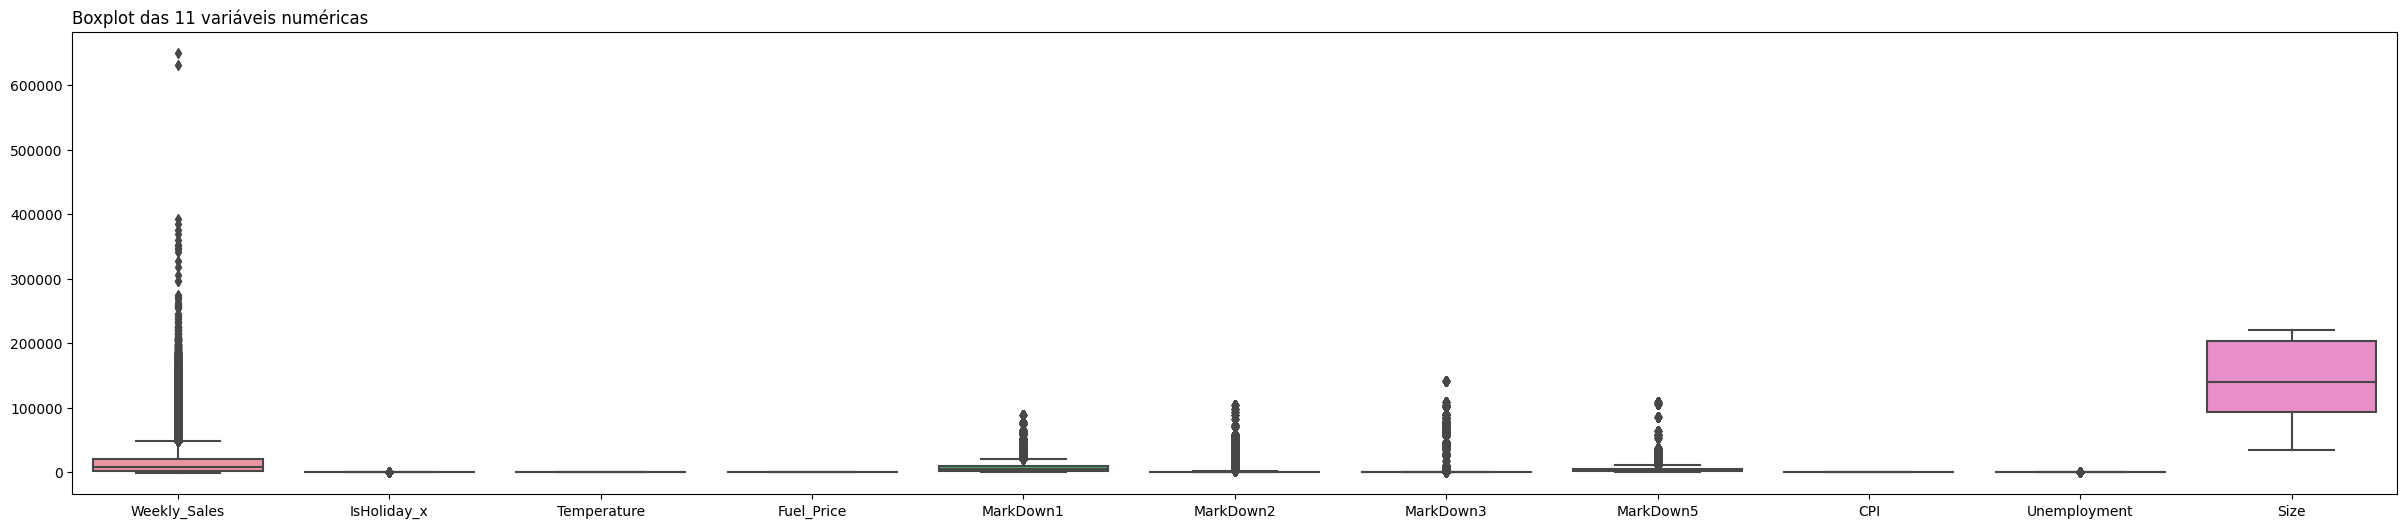

In [99]:
# Análise exploratória, através do Boxplot, para verificação de presença de Outliers
plt.figure(figsize=(30,6))
plt.title("Boxplot das 11 variáveis numéricas", loc='left')
ax = sns.boxplot(data = dfperiod)
plt.show()

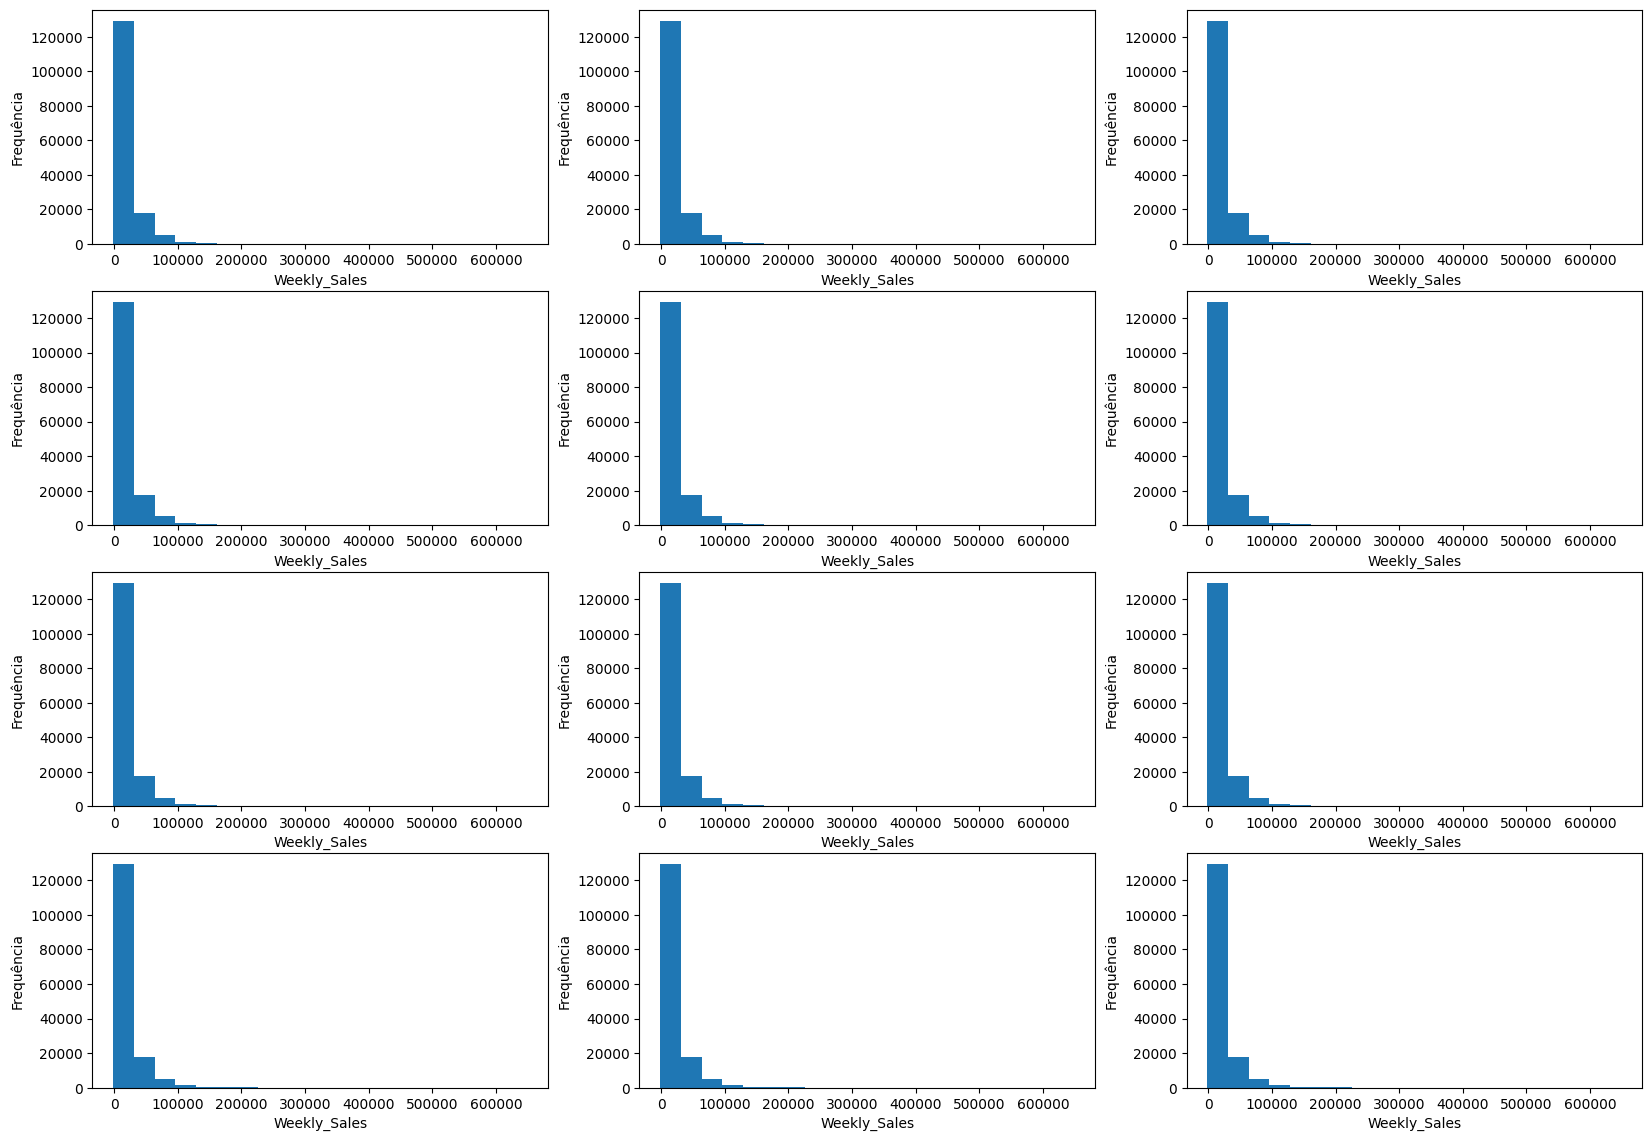

In [118]:
##Nome das colunas - Pode somente numericas
dfNumberCol = list(dfperiod.select_dtypes(include='number').columns)

##Tamanho subplot
ncols = 3
nrows = int(np.ceil(len(dfNumberCol)/(1.0 * ncols)))

##Plot
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,14))

counter = 0 

for i in range(nrows):
  for j in range(ncols):

    ax = axes[i][j]

    # Plotar somente quando houver dados
    if counter < len(dfNumberCol):

      ax.hist(dfperiod.select_dtypes(include='number')[dfNumberCol[counter]], bins=20)
      ax.set_xlabel(dfNumberCol[counter])
      ax.set_ylabel('Frequência')

    else:
      ax.set_axis_off()

      counter += 1

plt.show()

Como pode ser observado tanto pelo box plot quanto pelo gráfico de barras, as colunas numéricas, possui outliers e possuem suas distribuições conforme:

*Week_sales, possui uma Amplitude alta de 0 a 700 mil, enquanto Full Price possui amplitude de 2,50 a 4,50. O que demonstra que a depender do método de Machine Learning, é necessario um normalização das váriaveis numéricas. 

*Week_sales, MarkDown1, MarkDown2, MarkDown3, MarkDown5 =  Cauda Longa a Direita

*Temperature, Unemplyment, Fuel_price= Se aproximam de uma Distribuição Gaussiana (normal)

*Size= Possui seus valores distribuidos sem uniformidade, com pico

##### 3.3.6.1) Função para Outliers

In [101]:
""" #Função de Remoçãoo de Outliers. Através do fator, podemos alterar a margem para corte de outliers
def removeOutlier(values):
    fator = 1.5
    Q1, Q3 = np.percentile(values, [25, 75])
    IQR = Q3 - Q1
    lowpass = Q1 - (IQR * fator)
    highpass = Q3 + (IQR * fator)
    for v in values:
            if v > lowpass and v < highpass:
                return v """

In [ ]:
#Seleciono todas as váriaveis numéricas do DataSet para o tratamento
dfNumber = dfperiod.select_dtypes(include='number')

In [109]:
# Estabelencendo a função que remove os outliers por Coluna

def RemoverOutlier(ColunaRemocao):
 #Detection
    # IQR
    Q1 = np.percentile(ColunaRemocao, 25,
                    interpolation = 'midpoint')
    
    Q3 = np.percentile(ColunaRemocao, 75,
                    interpolation = 'midpoint')
    IQR = Q3 - Q1

    print("Old Shape: ", dfNumber.shape)
    
    # Upper bound
    upper = np.where(ColunaRemocao >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(ColunaRemocao <= (Q1-1.5*IQR))
    
    ''' Removendo os Outliers '''
    dfNumber.drop(upper[0], inplace = True)
    dfNumber.drop(lower[0], inplace = True)
    
    print("New Shape: ", dfNumber.shape)

In [120]:
dfNumberCol

['Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Size']

In [122]:
dfNumber["Fuel_Price"].describe()

count    141240.000000
mean          3.631847
std           0.278521
min           3.031000
25%           3.422000
50%           3.633000
75%           3.827000
max           4.308000
Name: Fuel_Price, dtype: float64

In [124]:
dfNumberCol = list(dfNumber.columns)
for coluna in dfNumberCol:
    dfNumber[coluna] = RemoverOutlier(dfNumber[coluna])

Old Shape:  (141240, 10)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7292\1130867991.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(ColunaRemocao, 25,
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7292\1130867991.py:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(ColunaRemocao, 75,


KeyError: '[52, 61, 62, 63, 69, 70, 73, 74, 78, 82, 87, 151, 3039, 3239, 3244, 3251, 3326, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3377, 3379, 3380, 3383, 3389, 3476, 3490, 3494, 3495, 3496, 3497, 3498, 3500, 3501, 3512, 3513, 3523, 3535, 3536, 3537, 3538, 3540, 3543, 3544, 3545, 3573, 3733, 3739, 3740, 3748, 3755, 3756, 10849, 10945, 12341, 14261, 14262, 14263, 16334, 16335, 16336, 16338, 16339, 16340, 16341, 16342, 16343, 16344, 18651, 18652, 18653, 18654, 19691, 19692, 19693, 19694, 19695, 21323, 21324, 21325, 29036, 32138, 32316, 32372, 32373, 32374, 32375, 32376, 32390, 32391, 32420, 32425, 32426, 32427, 32434, 32442, 32446, 32451, 32453, 32459, 32677, 32678, 32679, 32680, 35735, 35761, 35762, 35763, 35764, 35765, 35766, 35767, 35768, 35769, 35770, 35771, 35772, 35773, 35774, 35775, 35776, 35777, 35778, 35779, 35780, 35781, 35782, 35783, 35784, 36028, 36029, 36030, 38908, 38910, 38912, 38913, 38914, 38917, 38918, 38919, 38921, 38922, 38923, 38928, 38930, 38931, 38987, 39012, 39013, 39017, 39018, 39024, 39026, 39028, 39029, 39033, 39050, 39055, 39059, 39135, 41304, 41309, 41310, 42072, 42073, 42074, 42079, 42080, 42081, 42092, 42094, 42095, 42097, 42101, 42103, 42104, 42107, 42109, 42110, 43316, 43317, 43606, 43628, 44875, 47436, 47438, 47439, 47440, 47445, 47446, 48688, 50166, 50167, 50168, 50170, 50171, 50175, 50176, 50188, 50189, 50190, 55844, 55845, 55847, 55851, 55852, 55855, 55856, 55857, 55860, 55861, 55862, 55863, 55864, 55865, 55866, 55867, 55868, 55869, 55870, 55872, 55881, 55885, 60342, 60343, 63574, 64856, 64864, 64871, 64872, 64927, 65609, 65891, 66662, 66663, 66667, 66671, 66672, 66673, 66677, 68117, 68118, 68127, 68135, 68136, 68139, 68140, 68141, 68142, 68143, 68144, 68145, 68146, 68147, 68148, 68149, 68150, 68151, 68152, 68153, 68154, 68155, 68156, 68157, 68158, 68159, 68160, 68161, 68162, 68163, 68164, 68295, 68296, 68321, 68322, 68323, 68560, 68585, 68592, 68600, 68602, 68604, 68612, 68613, 68617, 68620, 68622, 68623, 68625, 68767, 68852, 68853, 68854, 68856, 68871, 68878, 68879, 68880, 68881, 68882, 68883, 69291, 69293, 70387, 71757, 71764, 71765, 71766, 71767, 71770, 71783, 71784, 71792, 71798, 71800, 71801, 71802, 71803, 71806, 71807, 71811, 71816, 71820, 71821, 71824, 71826, 71827, 71828, 71829, 71830, 71831, 71832, 71833, 71834, 71835, 71836, 71837, 71839, 71840, 71841, 71854, 71855, 71856, 71867, 71889, 71895, 71919, 71942, 71944, 71945, 72009, 72011, 72030, 72035, 72042, 72043, 72044, 72048, 72052, 72053, 72054, 72055, 72056, 72057, 72058, 72064, 72065, 72066, 72090, 72100, 72101, 72102, 72473, 75837, 75840, 75842, 76615, 76616, 76617, 76618, 77650, 77651, 78423, 79986, 79987, 79999, 80001, 80002, 80003, 86766, 97226, 97227, 97228, 97229, 97230, 97231, 97232, 97233, 97234, 97235, 97236, 97237, 97239, 97240, 97241, 97242, 97243, 97244, 97245, 97246, 97247, 97248, 97249, 97250, 97251, 97252, 97253, 97254, 97255, 97256, 97257, 97258, 97259, 97260, 97261, 97262, 97263, 97264, 97265, 97266, 97267, 97268, 97269, 97270, 97271, 97272, 97273, 97274, 97275, 97276, 97708, 100465, 100896, 110693, 113009, 113014, 120380, 120385, 120602, 121016, 121017, 127901, 129026, 129027, 129028, 129029, 129030, 129031, 129032, 132716, 132717, 132718, 132719, 132721, 132722, 132723, 132725, 132728, 132729, 132730, 132731, 132732, 132733, 132734, 132736, 132737, 132738, 132739, 132740, 132741, 132742, 132744, 132745, 132747, 132748, 132749, 132750, 132752, 132753, 132755, 132756, 132760, 132761, 132762, 132842, 132843, 132849, 132850, 140439] not found in axis'

In [ ]:
dfNumber['Weekly_Sales']= removeOutlier(dfNumber['Weekly_Sales'])
dfNumber['Temperature']= removeOutlier(dfNumber['Temperature'])

In [ ]:
dfNumber.describe()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,Size
count,1.543310e+05,1.543310e+05,154331.000000,154331.000000,154331.000000,154331.000000,154331.000000,154331.000000,154331.000000,154331.000000
mean,2.079758e+04,6.931000e+01,3.630823,6808.627640,2402.416006,1276.404115,4264.093468,174.466501,7.470799,136390.997564
std,1.091397e-11,4.263270e-14,0.278647,8389.919216,8183.055587,9081.302129,6006.460415,40.183156,1.737576,61092.156808
min,2.079758e+04,6.931000e+01,3.031000,0.000000,-265.760000,-29.100000,0.000000,129.693800,4.077000,34875.000000
25%,2.079758e+04,6.931000e+01,3.417000,1064.810000,0.000000,1.190000,1508.560000,136.478800,6.432000,93638.000000
50%,2.079758e+04,6.931000e+01,3.633000,4923.890000,58.480000,13.100000,3029.000000,188.350400,7.280000,140167.000000
75%,2.079758e+04,6.931000e+01,3.827000,8920.010000,599.500000,83.070000,5335.650000,219.179453,8.256000,202505.000000
max,2.079758e+04,6.931000e+01,4.308000,88646.760000,104519.540000,141630.610000,108519.280000,226.763073,12.890000,219622.000000


In [ ]:
""" #Aplica a Função em todas as colunas númericas que 
for remover in dfNumber[dfNumberCol]:
    removeOutlier(values=remover) """

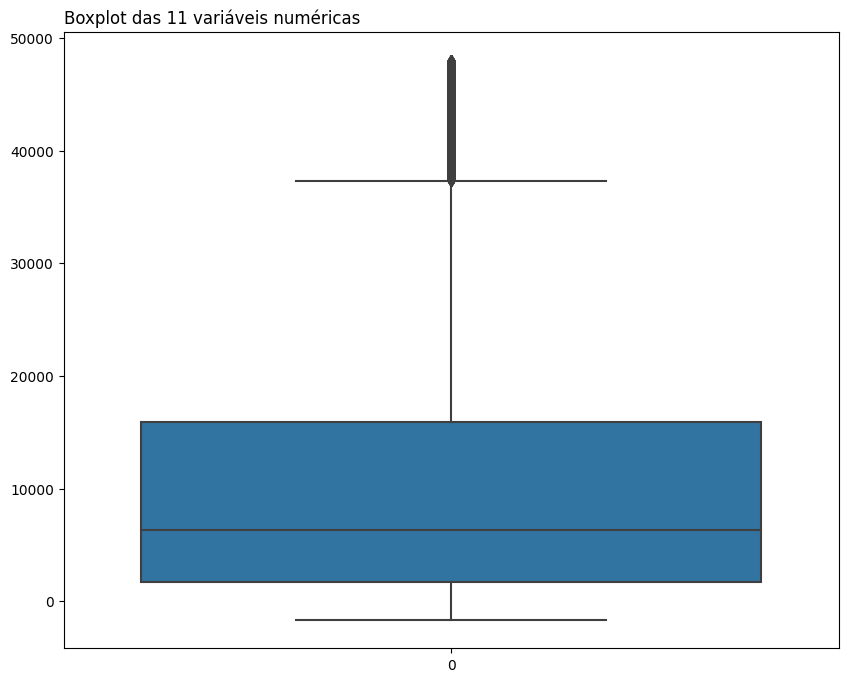

In [123]:
# Análise exploratória, através do Boxplot, para verificação de presença de Outliers
plt.figure(figsize=(10,8))
plt.title("Boxplot das 11 variáveis numéricas", loc='left')
ax = sns.boxplot(data = dfNumber["Weekly_Sales"])
plt.show()